> **Not:**  
> Bu çalışma TÜİK Dış Ticaret İstatistikleri ve Avrupa Birliği'nin resmi CBAM emisyon faktörleri tablolarından elde edilen gerçek veriler kullanılarak hazırlanmıştır.


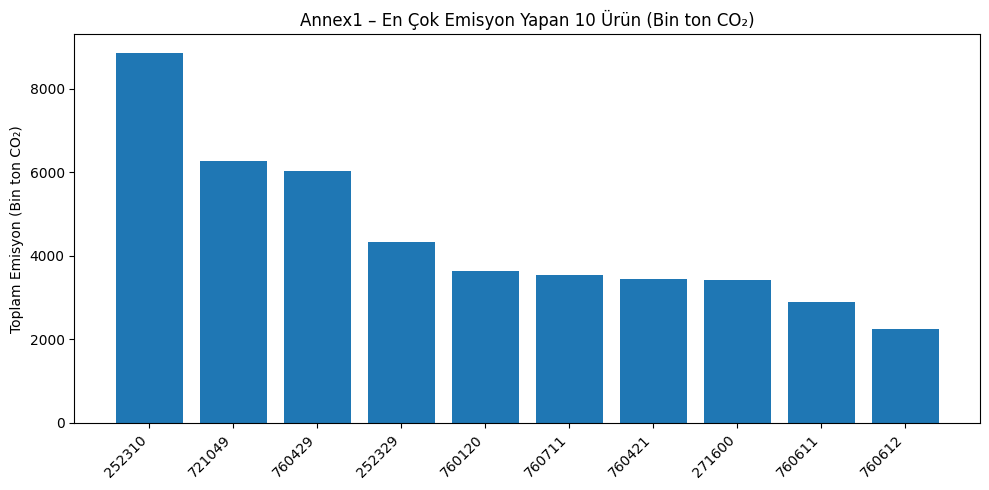

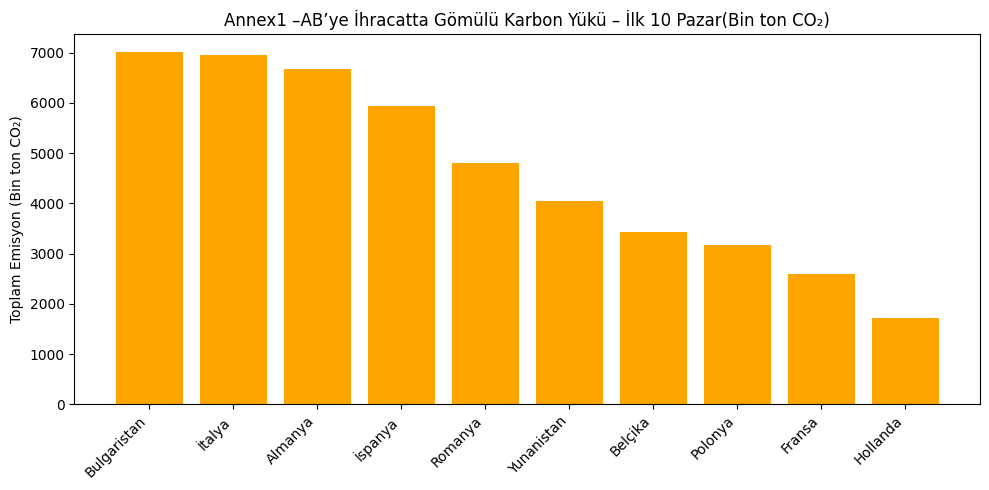

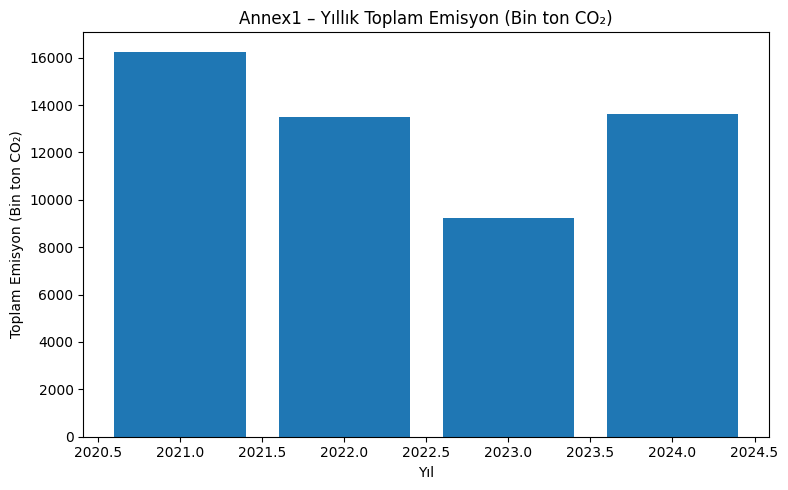

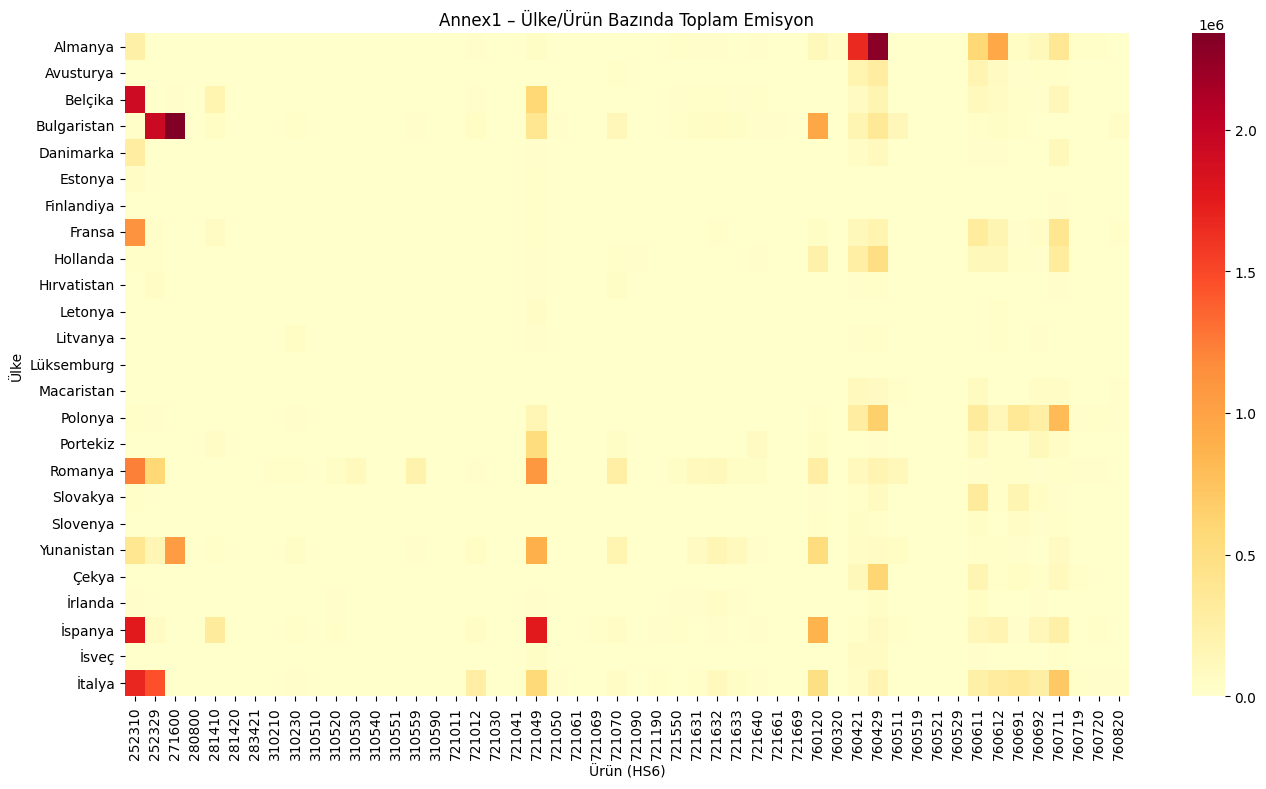

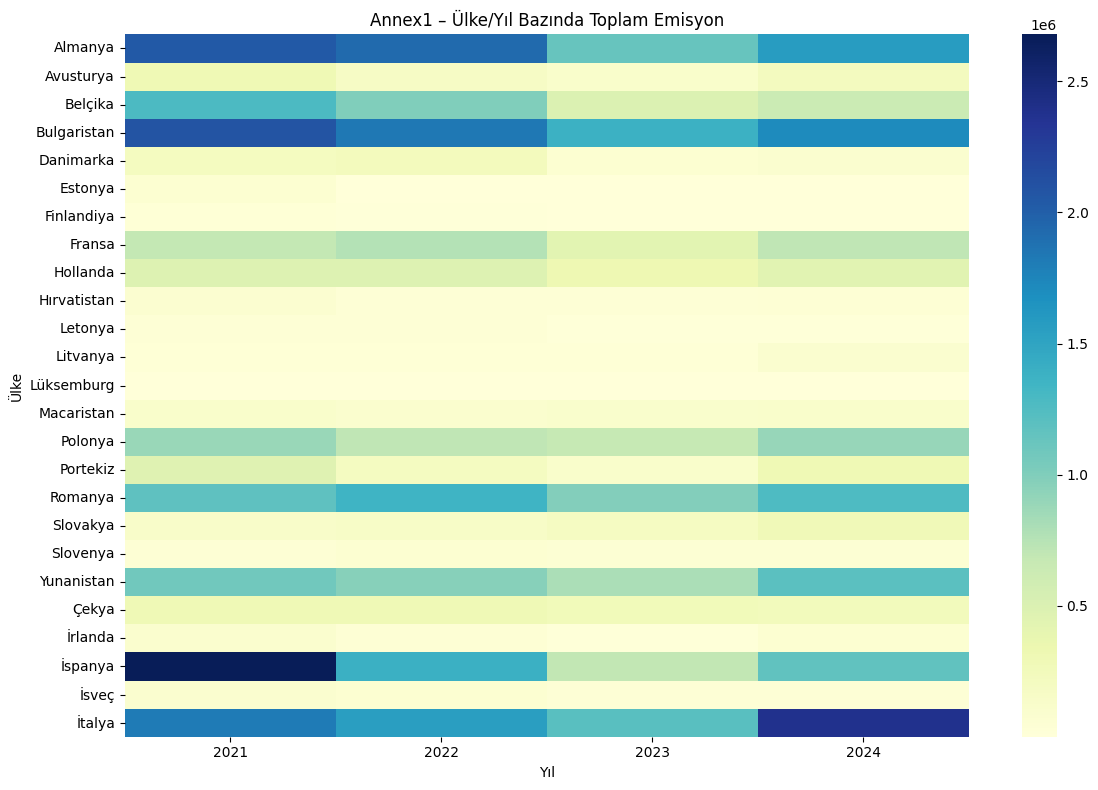

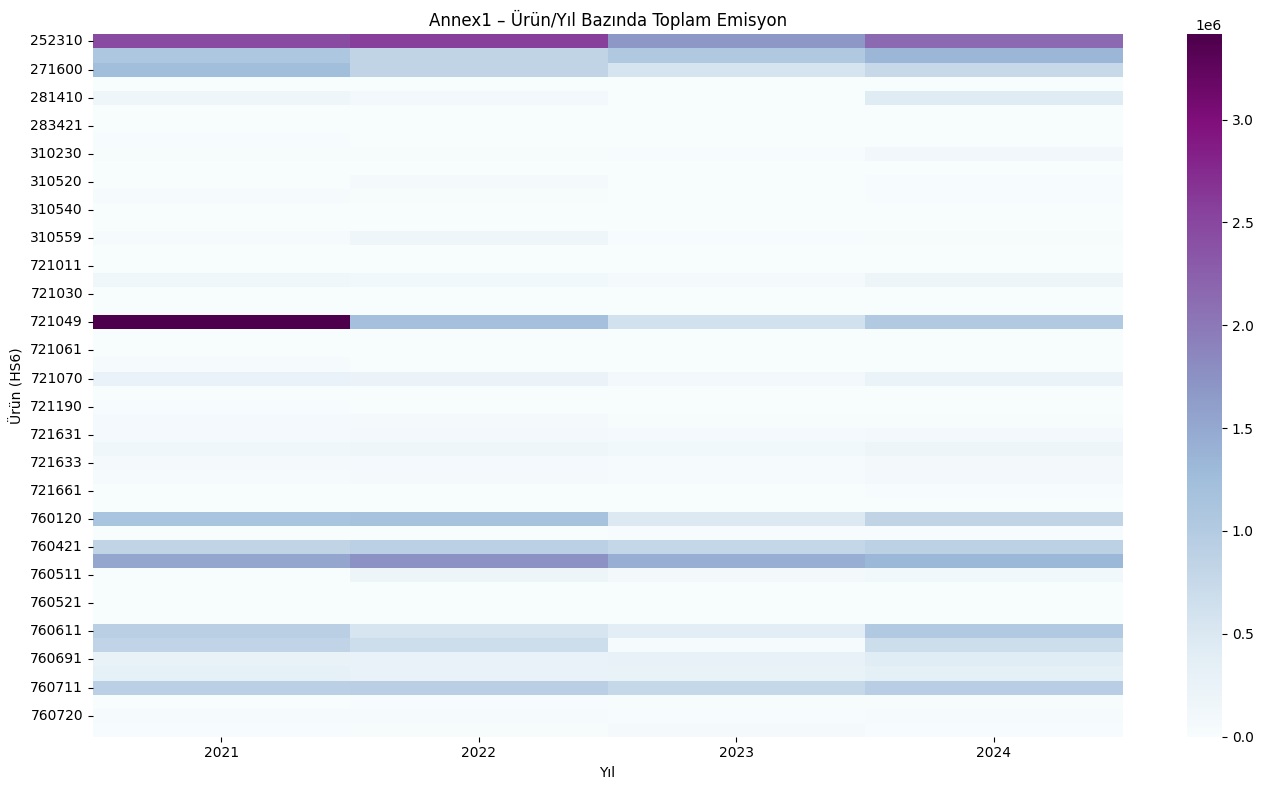

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df1 = pd.read_excel("annex1_datas.xlsx", sheet_name='Sheet1')
df1['HS6'] = df1['HS6'].astype(str)

# ÜRÜN BAZINDA TOPLAM
urun_tab = df1.groupby(['HS6', 'HS6 adı']).agg({
    'CBAM_TON': 'sum',
    'Cbam_Sum_Emission_tCO₂e': 'sum',
    'Emisyon_Total': 'mean'
}).reset_index()

top10_urun = urun_tab.sort_values(by='Cbam_Sum_Emission_tCO₂e', ascending=False).head(10)
plt.figure(figsize=(10,5))
plt.bar(top10_urun['HS6'] , top10_urun['Cbam_Sum_Emission_tCO₂e']/1000)
plt.title('Annex1 – En Çok Emisyon Yapan 10 Ürün (Bin ton CO₂)')
plt.ylabel('Toplam Emisyon (Bin ton CO₂)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# ÜLKE BAZINDA TOPLAM
ulke_tab = df1.groupby(['Ulke adı']).agg({
    'CBAM_TON': 'sum',
    'Cbam_Sum_Emission_tCO₂e': 'sum'
}).reset_index()
top10_ulke = ulke_tab.sort_values(by='Cbam_Sum_Emission_tCO₂e', ascending=False).head(10)
plt.figure(figsize=(10,5))
plt.bar(top10_ulke['Ulke adı'], top10_ulke['Cbam_Sum_Emission_tCO₂e']/1000, color='orange')
plt.title('Annex1 –AB’ye İhracatta Gömülü Karbon Yükü – İlk 10 Pazar(Bin ton CO₂)')
plt.ylabel('Toplam Emisyon (Bin ton CO₂)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# YIL BAZINDA TOPLAM
yil_tab = df1.groupby(['Yıl']).agg({
    'CBAM_TON': 'sum',
    'Cbam_Sum_Emission_tCO₂e': 'sum'
}).reset_index()
plt.figure(figsize=(8,5))
plt.bar(yil_tab['Yıl'], yil_tab['Cbam_Sum_Emission_tCO₂e']/1000)
plt.title('Annex1 – Yıllık Toplam Emisyon (Bin ton CO₂)')
plt.xlabel('Yıl')
plt.ylabel('Toplam Emisyon (Bin ton CO₂)')
plt.tight_layout()
plt.show()

# ÜRÜN + ÜLKE (Pivot Table, Heatmap)
pivot1 = df1.pivot_table(index='Ulke adı', columns='HS6', values='Cbam_Sum_Emission_tCO₂e', aggfunc='sum', fill_value=0)
plt.figure(figsize=(14,8))
sns.heatmap(pivot1, cmap='YlOrRd', annot=False)
plt.title('Annex1 – Ülke/Ürün Bazında Toplam Emisyon')
plt.xlabel('Ürün (HS6)')
plt.ylabel('Ülke')
plt.tight_layout()
plt.show()

# ÜLKE + YIL (Heatmap)
pivot2 = df1.pivot_table(index='Ulke adı', columns='Yıl', values='Cbam_Sum_Emission_tCO₂e', aggfunc='sum', fill_value=0)
plt.figure(figsize=(12,8))
sns.heatmap(pivot2, cmap='YlGnBu', annot=False)
plt.title('Annex1 – Ülke/Yıl Bazında Toplam Emisyon')
plt.xlabel('Yıl')
plt.ylabel('Ülke')
plt.tight_layout()
plt.show()

# ÜRÜN + YIL (Heatmap)
pivot3 = df1.pivot_table(index='HS6', columns='Yıl', values='Cbam_Sum_Emission_tCO₂e', aggfunc='sum', fill_value=0)
plt.figure(figsize=(14,8))
sns.heatmap(pivot3, cmap='BuPu', annot=False)
plt.title('Annex1 – Ürün/Yıl Bazında Toplam Emisyon')
plt.xlabel('Yıl')
plt.ylabel('Ürün (HS6)')
plt.tight_layout()
plt.show()


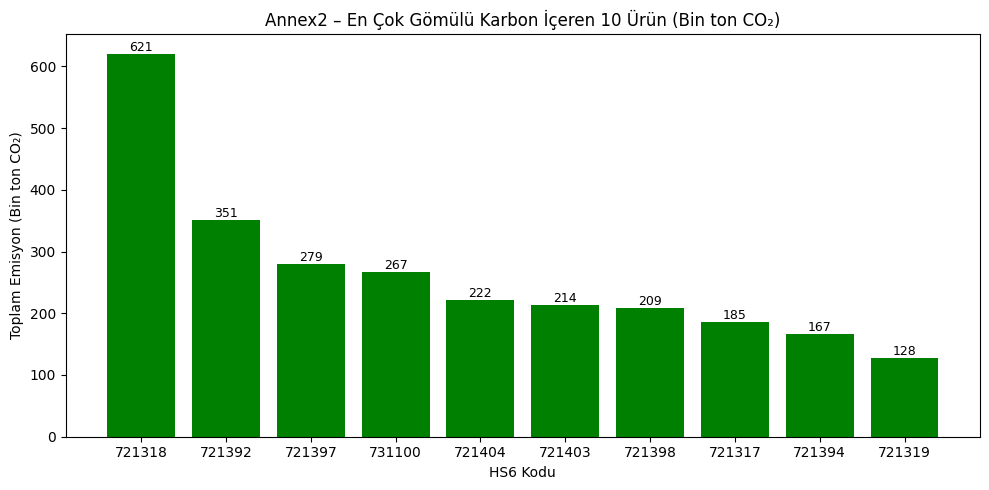

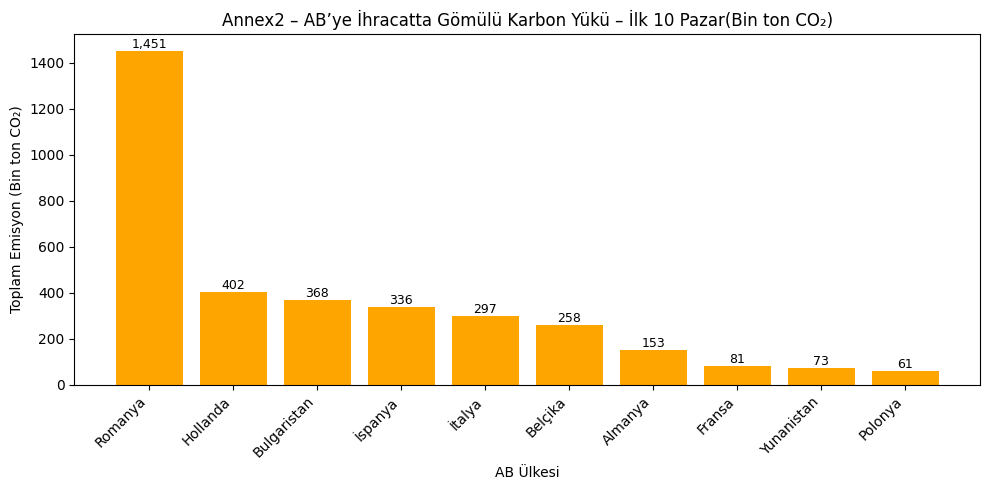

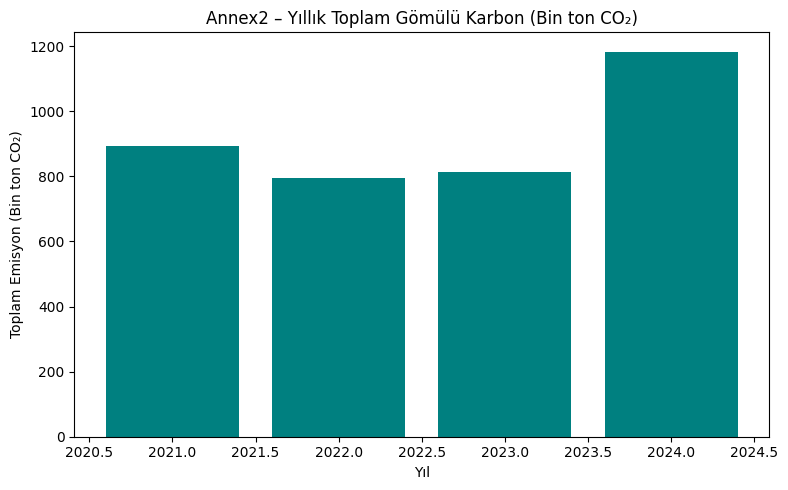

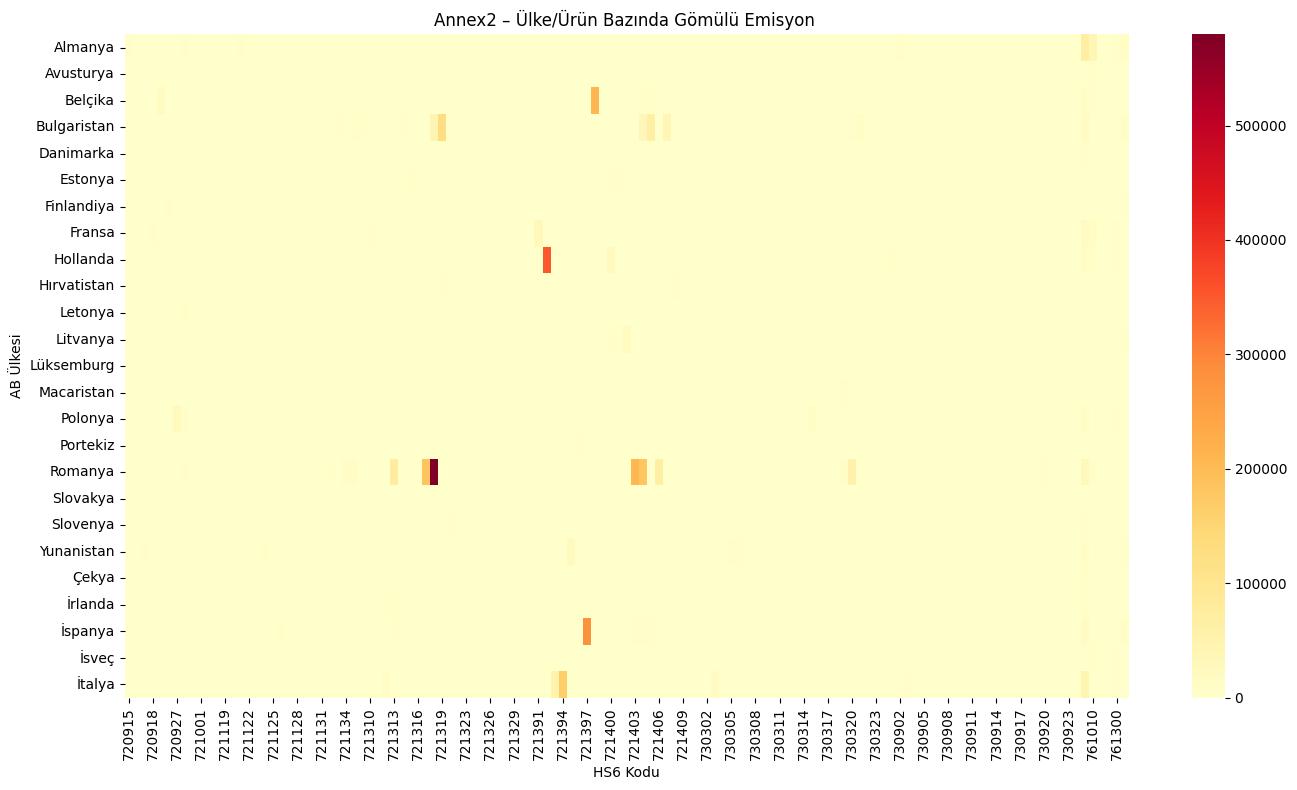

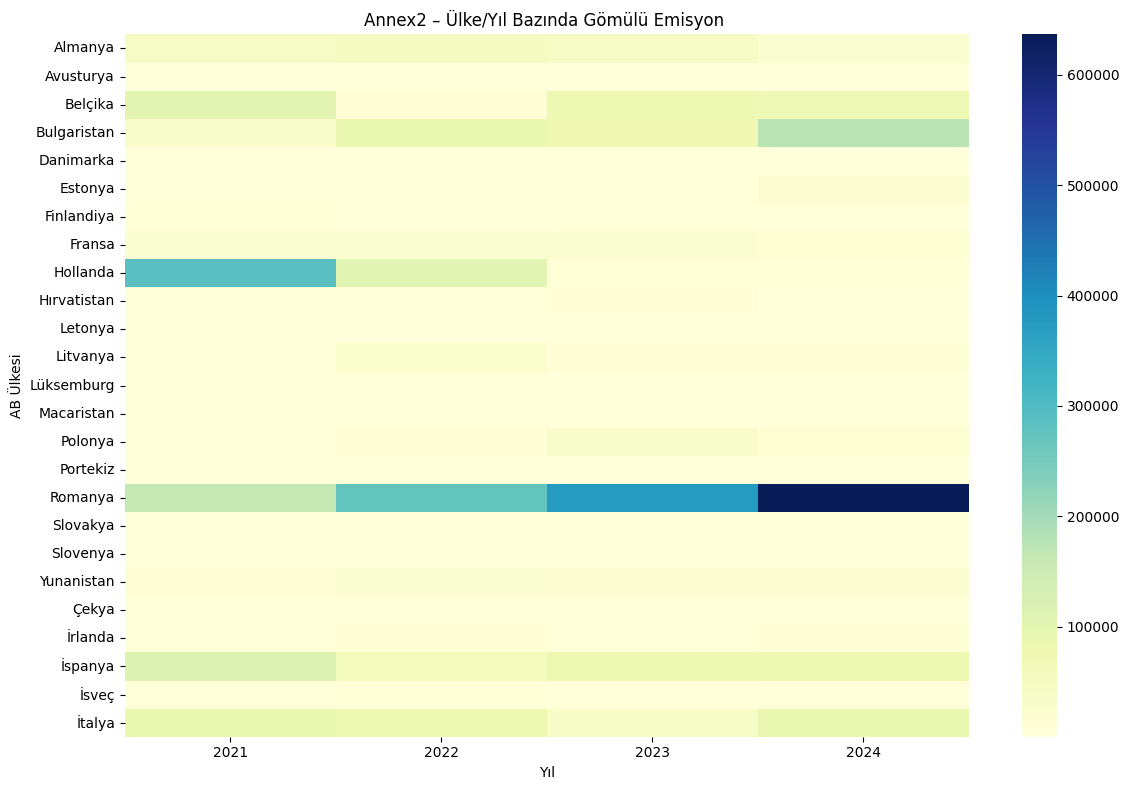

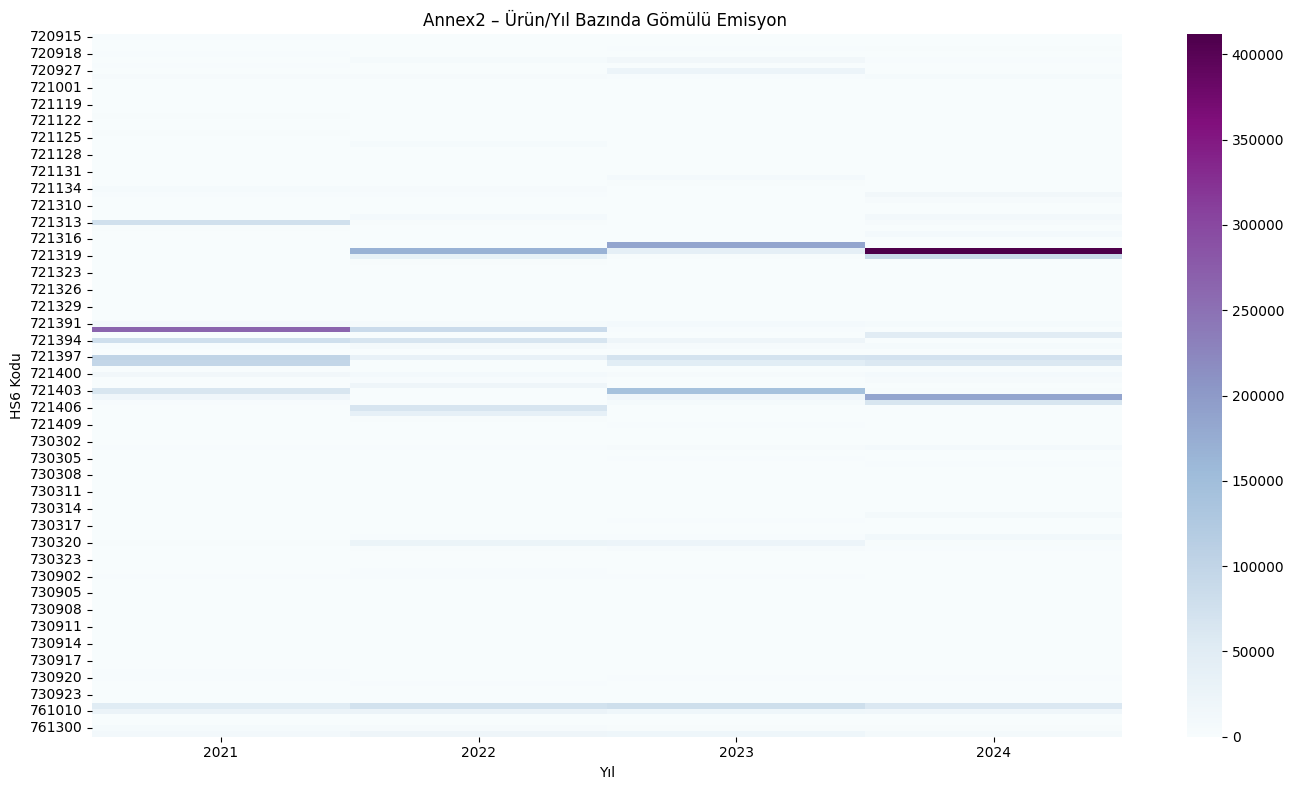

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df2 = pd.read_excel("annex2_datas.xlsx", sheet_name='Sheet1')
df2['HS6'] = df2['HS6'].astype(str)

# 1. ÜRÜN BAZINDA TOPLAM
urun_tab2 = df2.groupby(['HS6']).agg({
    'CBAM_TON': 'sum',
    'Cbam_Sum_Emission_tCO₂e': 'sum',
    'direct_emission_factor': 'mean'
}).reset_index()
urun_tab2 = urun_tab2.rename(columns={
    'Cbam_Sum_Emission_tCO₂e': 'Toplam_Emisyon',
    'direct_emission_factor': 'Emisyon_Faktörü'
})

top10_urun2 = urun_tab2.sort_values(by='Toplam_Emisyon', ascending=False).head(10)
plt.figure(figsize=(10,5))
plt.bar(top10_urun2['HS6'], top10_urun2['Toplam_Emisyon']/1000, color='green')
plt.title('Annex2 – En Çok Gömülü Karbon İçeren 10 Ürün (Bin ton CO₂)')
plt.ylabel('Toplam Emisyon (Bin ton CO₂)')
plt.xlabel('HS6 Kodu')
for i, v in enumerate(top10_urun2['Toplam_Emisyon']/1000):
    plt.text(i, v, f"{v:,.0f}", ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.show()

# 2. ÜLKE BAZINDA TOPLAM
ulke_tab2 = df2.groupby(['ULKE ADI']).agg({
    'CBAM_TON': 'sum',
    'Cbam_Sum_Emission_tCO₂e': 'sum'
}).reset_index()
top10_ulke2 = ulke_tab2.sort_values(by='Cbam_Sum_Emission_tCO₂e', ascending=False).head(10)
plt.figure(figsize=(10,5))
plt.bar(top10_ulke2['ULKE ADI'], top10_ulke2['Cbam_Sum_Emission_tCO₂e']/1000, color='orange')
plt.title('Annex2 – AB’ye İhracatta Gömülü Karbon Yükü – İlk 10 Pazar(Bin ton CO₂)')
plt.ylabel('Toplam Emisyon (Bin ton CO₂)')
plt.xlabel('AB Ülkesi')
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(top10_ulke2['Cbam_Sum_Emission_tCO₂e']/1000):
    plt.text(i, v, f"{v:,.0f}", ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.show()

# 3. YIL BAZINDA TOPLAM
yil_tab2 = df2.groupby(['YIL']).agg({
    'CBAM_TON': 'sum',
    'Cbam_Sum_Emission_tCO₂e': 'sum'
}).reset_index()
plt.figure(figsize=(8,5))
plt.bar(yil_tab2['YIL'], yil_tab2['Cbam_Sum_Emission_tCO₂e']/1000, color='teal')
plt.title('Annex2 – Yıllık Toplam Gömülü Karbon (Bin ton CO₂)')
plt.xlabel('Yıl')
plt.ylabel('Toplam Emisyon (Bin ton CO₂)')
plt.tight_layout()
plt.show()

# 4. ÜRÜN + ÜLKE (Pivot Table, Heatmap)
pivot2_1 = df2.pivot_table(index='ULKE ADI', columns='HS6', values='Cbam_Sum_Emission_tCO₂e', aggfunc='sum', fill_value=0)
plt.figure(figsize=(14,8))
sns.heatmap(pivot2_1, cmap='YlOrRd', annot=False)
plt.title('Annex2 – Ülke/Ürün Bazında Gömülü Emisyon ')
plt.xlabel('HS6 Kodu')
plt.ylabel('AB Ülkesi')
plt.tight_layout()
plt.show()

# 5. ÜLKE + YIL (Heatmap)
pivot2_2 = df2.pivot_table(index='ULKE ADI', columns='YIL', values='Cbam_Sum_Emission_tCO₂e', aggfunc='sum', fill_value=0)
plt.figure(figsize=(12,8))
sns.heatmap(pivot2_2, cmap='YlGnBu', annot=False)
plt.title('Annex2 – Ülke/Yıl Bazında Gömülü Emisyon ')
plt.xlabel('Yıl')
plt.ylabel('AB Ülkesi')
plt.tight_layout()
plt.show()

# 6. ÜRÜN + YIL (Heatmap)
pivot2_3 = df2.pivot_table(index='HS6', columns='YIL', values='Cbam_Sum_Emission_tCO₂e', aggfunc='sum', fill_value=0)
plt.figure(figsize=(14,8))
sns.heatmap(pivot2_3, cmap='BuPu', annot=False)
plt.title('Annex2 – Ürün/Yıl Bazında Gömülü Emisyon ')
plt.xlabel('Yıl')
plt.ylabel('HS6 Kodu')
plt.tight_layout()
plt.show()


        HS6    CBAM_TON   cbam_direct    cbam_total  direct_oran  \
38   721318  328436.327  620744.65803  725844.28267    85.520362   
120  761010   35251.317   96236.09541  424073.34351    22.693267   
52   721392  185732.059  351033.59151  410467.85039    85.520362   
57   721397  147855.673  279447.22197  326761.03733    85.520362   
119  731100  141201.443  266870.72727  312055.18903    85.520362   
124  761410   28031.880   64753.64280  274712.42400    23.571429   
64   721404  117446.445  221973.78105  259556.64345    85.520362   
63   721403  113113.628  213784.75692  249981.11788    85.520362   
58   721398  110330.609  208524.85101  243830.64589    85.520362   
37   721317   98139.885  185484.38265  216889.14585    85.520362   

     indirect_oran  
38       14.479638  
120      77.306733  
52       14.479638  
57       14.479638  
119      14.479638  
124      76.428571  
64       14.479638  
63       14.479638  
58       14.479638  
37       14.479638  


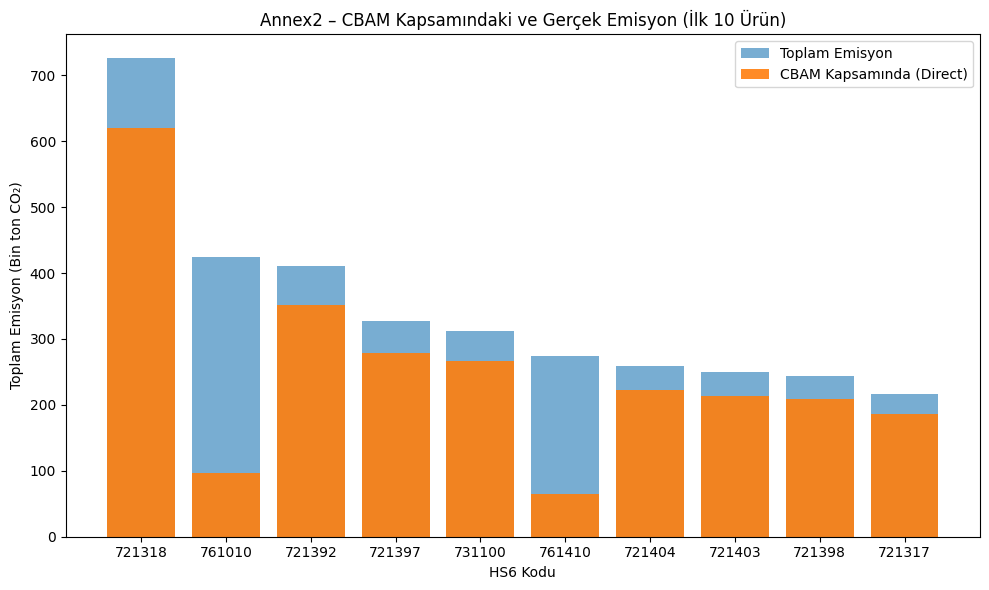

In [12]:
import pandas as pd

df2 = pd.read_excel("annex2_datas.xlsx", sheet_name='Sheet1')
df2['HS6'] = df2['HS6'].astype(str)

# Her ürün için toplam direct, indirect ve total emisyonu hesapla
urun_emi2 = df2.groupby(['HS6']).agg({
    'CBAM_TON': 'sum',
    'direct_emission_factor': 'mean',
    'indirect_emission_factor': 'mean'
}).reset_index()

urun_emi2['total_emission_factor'] = urun_emi2['direct_emission_factor'] + urun_emi2['indirect_emission_factor']
urun_emi2['cbam_direct'] = urun_emi2['CBAM_TON'] * urun_emi2['direct_emission_factor']
urun_emi2['cbam_total'] = urun_emi2['CBAM_TON'] * urun_emi2['total_emission_factor']

# CBAM KAPSAMINDA KAYIP/FARK ORANI:
urun_emi2['direct_oran'] = 100 * urun_emi2['cbam_direct'] / urun_emi2['cbam_total']  # CBAM'da ne kadarı sayılıyor?
urun_emi2['indirect_oran'] = 100 - urun_emi2['direct_oran']                          # Kapsam dışı kalan oran

# Sıralı tablo
compare_tab = urun_emi2[['HS6', 'CBAM_TON', 'cbam_direct', 'cbam_total', 'direct_oran', 'indirect_oran']].sort_values(by='cbam_total', ascending=False)

print(compare_tab.head(10))
import matplotlib.pyplot as plt

top10 = compare_tab.head(10)
plt.figure(figsize=(10,6))
plt.bar(top10['HS6'], top10['cbam_total']/1000, label='Toplam Emisyon', alpha=0.6)
plt.bar(top10['HS6'], top10['cbam_direct']/1000, label='CBAM Kapsamında (Direct)', alpha=0.9)
plt.ylabel('Toplam Emisyon (Bin ton CO₂)')
plt.xlabel('HS6 Kodu')
plt.title('Annex2 – CBAM Kapsamındaki ve Gerçek Emisyon (İlk 10 Ürün)')
plt.legend()
plt.tight_layout()
plt.show()


In [19]:

tab1 = df1.groupby('HS6').agg({
    'CBAM_TON': 'sum',
    'Emisyon_Total': 'mean'
}).reset_index()
tab1['cbam_emisyon'] = tab1['CBAM_TON'] * tab1['Emisyon_Total']
tab1 = tab1.rename(columns={'cbam_emisyon': 'CBAM_Kapsam_Emisyon_Annex1', 'CBAM_TON': 'TON_Annex1'})

tab2 = df2.groupby('HS6').agg({
    'CBAM_TON': 'sum',
    'direct_emission_factor': 'mean',
    'indirect_emission_factor': 'mean'
}).reset_index()
tab2['total_emission_factor'] = tab2['direct_emission_factor'] + tab2['indirect_emission_factor']
tab2['cbam_emisyon'] = tab2['CBAM_TON'] * tab2['direct_emission_factor']
tab2['gercek_total_emisyon'] = tab2['CBAM_TON'] * tab2['total_emission_factor']
tab2 = tab2.rename(columns={'cbam_emisyon': 'CBAM_Kapsam_Emisyon_Annex2', 'CBAM_TON': 'TON_Annex2'})

merged = pd.merge(tab1, tab2, on='HS6', how='outer', suffixes=('_A1', '_A2')).fillna(0)

merged['Toplam_Gercek_Emisyon'] = merged['CBAM_Kapsam_Emisyon_Annex1'] + merged['gercek_total_emisyon']
merged['CBAM_Kapsaminda_Emisyon'] = merged['CBAM_Kapsam_Emisyon_Annex1'] + merged['CBAM_Kapsam_Emisyon_Annex2']
merged['CBAM_Kapsama_Orani'] = 100 * merged['CBAM_Kapsaminda_Emisyon'] / merged['Toplam_Gercek_Emisyon']


        HS6  CBAM_Kapsaminda_Emisyon  Toplam_Gercek_Emisyon  \
170  761010              96236.09541           424073.34351   
174  761410              64753.64280           274712.42400   
173  761300              21139.33250            89509.55125   
172  761210               3956.50970            16752.91345   
171  761100               4667.16536            19762.01836   
132  730904               1783.75029             2136.87852   
141  730913                271.35962              325.08056   
139  730911                190.96392              228.76896   
137  730909                803.61816              962.71008   
136  730908               1281.30967             1534.96996   

     CBAM_Kapsama_Orani  Kapsama_Disinda_Oran  
170           22.693267             77.306733  
174           23.571429             76.428571  
173           23.616846             76.383154  
172           23.616846             76.383154  
171           23.616846             76.383154  
132           83.4

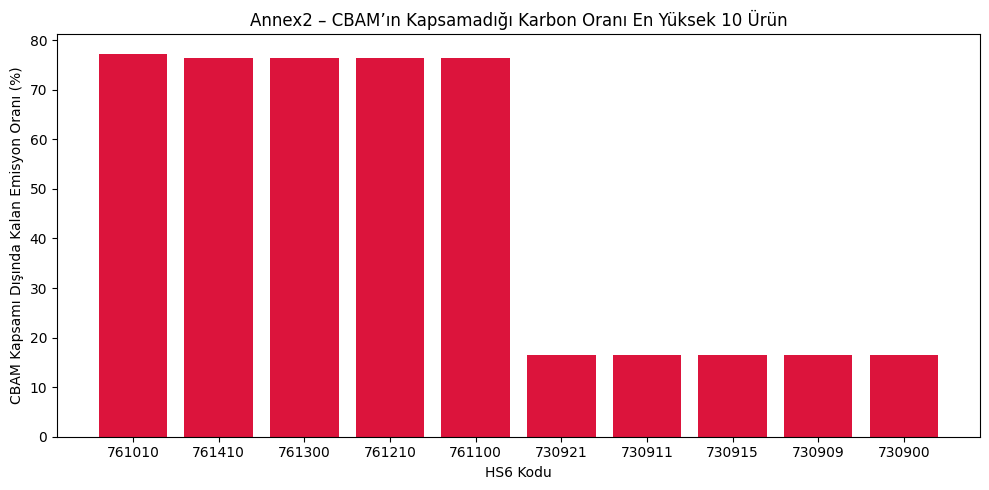

In [18]:

oran_fark = merged[merged['Toplam_Gercek_Emisyon'] > 0].copy()
oran_fark['Kapsama_Disinda_Oran'] = 100 - oran_fark['CBAM_Kapsama_Orani']
oran_fark = oran_fark.sort_values(by='Kapsama_Disinda_Oran', ascending=False)
print(oran_fark[['HS6', 'CBAM_Kapsaminda_Emisyon', 'Toplam_Gercek_Emisyon', 'CBAM_Kapsama_Orani', 'Kapsama_Disinda_Oran']].head(10))
import matplotlib.pyplot as plt
annex2_sadece = merged[merged['TON_Annex2'] > 0]
annex2_sadece = annex2_sadece[annex2_sadece['Toplam_Gercek_Emisyon'] > 0]
annex2_sadece = annex2_sadece.copy()
annex2_sadece['Kapsama_Disinda_Oran'] = 100 - annex2_sadece['CBAM_Kapsama_Orani']
annex2_sadece = annex2_sadece.sort_values(by='Kapsama_Disinda_Oran', ascending=False)
plt.figure(figsize=(10,5))
plt.bar(annex2_sadece.head(10)['HS6'], annex2_sadece.head(10)['Kapsama_Disinda_Oran'], color='crimson')
plt.ylabel('CBAM Kapsamı Dışında Kalan Emisyon Oranı (%)')
plt.xlabel('HS6 Kodu')
plt.title('Annex2 – CBAM’ın Kapsamadığı Karbon Oranı En Yüksek 10 Ürün')
plt.tight_layout()
plt.show()


In [16]:
import pandas as pd
with pd.ExcelWriter('cbam_butun_analizler1.xlsx') as writer:
    urun_tab.to_excel(writer, sheet_name='Annex1_Urun', index=False)
    ulke_tab.to_excel(writer, sheet_name='Annex1_Ulke', index=False)
    yil_tab.to_excel(writer, sheet_name='Annex1_Yil', index=False)
    pivot1.to_excel(writer, sheet_name='Annex1_Ulke_Urun_Pivot')
    pivot2.to_excel(writer, sheet_name='Annex1_Ulke_Yil_Pivot')
    pivot3.to_excel(writer, sheet_name='Annex1_Urun_Yil_Pivot')

    urun_tab2.to_excel(writer, sheet_name='Annex2_Urun', index=False)
    ulke_tab2.to_excel(writer, sheet_name='Annex2_Ulke', index=False)
    yil_tab2.to_excel(writer, sheet_name='Annex2_Yil', index=False)
    pivot2_1.to_excel(writer, sheet_name='Annex2_Ulke_Urun_Pivot')
    pivot2_2.to_excel(writer, sheet_name='Annex2_Ulke_Yil_Pivot')
    pivot2_3.to_excel(writer, sheet_name='Annex2_Urun_Yil_Pivot')

    compare_tab.to_excel(writer, sheet_name='Direct_vs_Total', index=False)
    oran_fark.to_excel(writer, sheet_name='CBAM_Kapsam_Oran', index=False)
    annex2_sadece.to_excel(writer, sheet_name='Annex2_Kapsam_Disinda', index=False)
